In [1]:
import os
import tarfile
import urllib
import urllib.request
import pandas as pd
import numpy as np



## 1. Fetch data 

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [3]:
# fetch housing data from the web and write it to a path.

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
# Function to load housing data from a path.

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:

fetch_housing_data()
housing = load_housing_data()

## 2. Get data summary

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

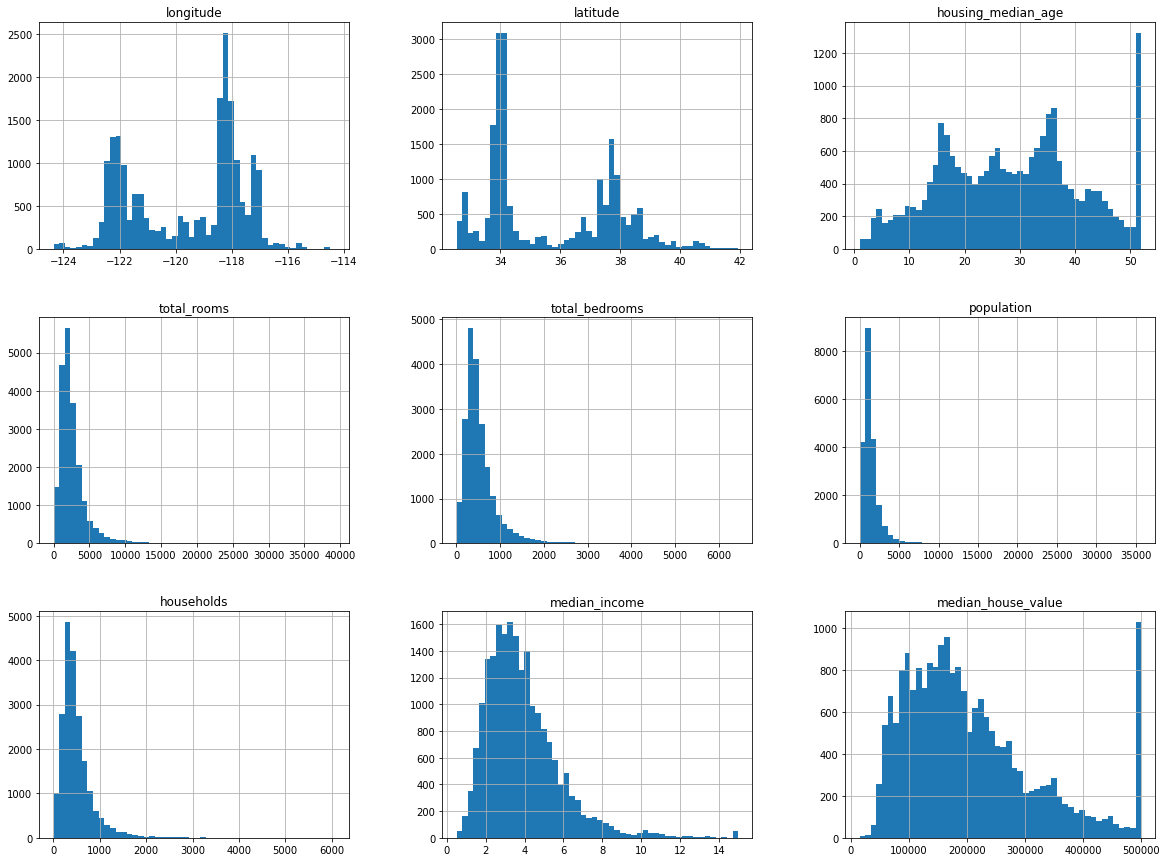

In [ ]:
%matplotlib inline   
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


## 3. Split the data

In [9]:
# method 1
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [ ]:
# method 2

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [ ]:
# method 3
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole datase.It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough.

In [11]:
# create income categories based on median income 
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

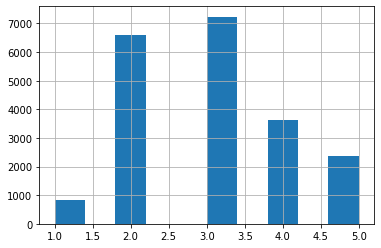

In [12]:
housing["income_cat"].hist()


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

# for startified random sampling 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

## Analyse features 

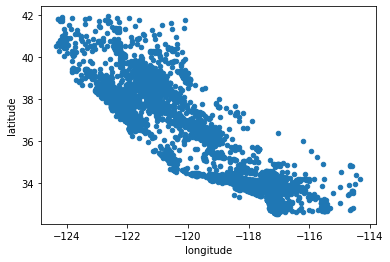

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points (Figure 2-12):

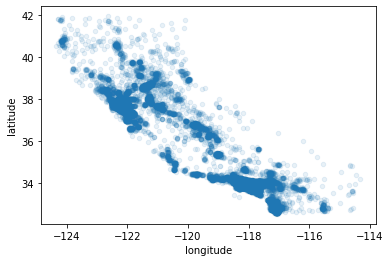

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


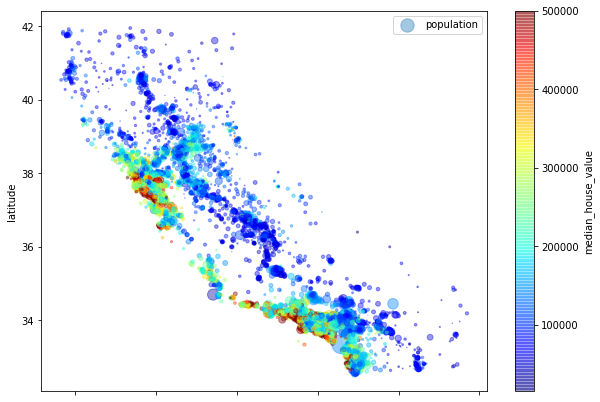

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


## Create correlation matrices

In [ ]:
corr_matrix = housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8cc8f4fd0>,
      dtype=object)

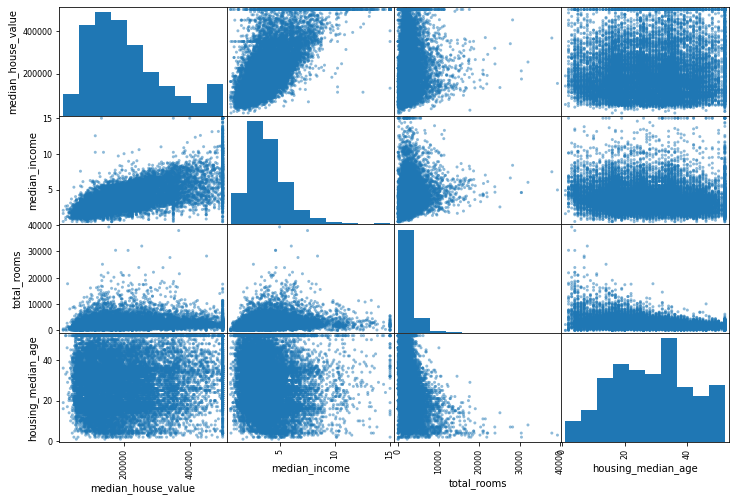

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


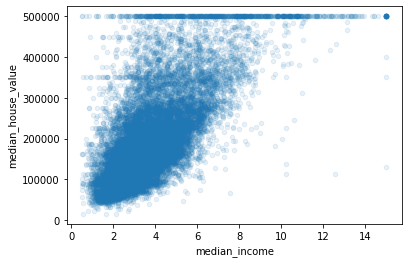

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

## Experimenting with Attribute Combinations


In [16]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

## Prepare the Data for Machine Learning Algorithms

In [17]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [18]:
# impute missing values 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [19]:
housing_num = housing.drop("ocean_proximity", axis=1)


In [20]:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [21]:
X = imputer.transform(housing_num)

In [22]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [23]:
# handle categorical feature 
housing_cat = housing[["ocean_proximity"]]

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
 ordinal_encoder = OrdinalEncoder()

In [26]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
cat_encoder = OneHotEncoder(handle_unknown = "ignore")

In [29]:
 housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [30]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [31]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin


## Custom Transformers


In [33]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not.

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like (as long as they are unique and don’t contain double underscores, __); they will come in handy later for hyperparameter tuning.

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the fit() method

## Transformation Pipelines


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model


In [ ]:
# 1. Linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

This is better than nothing, but clearly not a great score: most districts’ median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying. This is an example of a model underfitting the training data.

In [ ]:
# 2. Decision tree model
# for non linear relationships and fit more 
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

 It is much more likely that the model has badly overfit the data. 

The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [ ]:
display_scores(tree_rmse_scores)


Scores: [71496.61087766 70041.14460408 69024.90060917 71513.59389635
 70064.26776699 77893.06084067 71836.81549268 74525.19171018
 69181.81935606 71326.03035083]
Mean: 71690.3435504674
Standard deviation: 2559.184950767715


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)

In [ ]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [ ]:
display_scores(lin_rmse_scores)


Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694



Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning,

In [ ]:
# model 3: randomforest regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()

In [ ]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)

In [ ]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [ ]:
display_scores(forest_rmse_scores)

Scores: [51610.99905386 48928.24870474 46880.52276697 51835.3700585
 47609.77963491 51845.27665564 52966.97401451 50092.4970605
 48679.87791266 53494.10033045]
Mean: 50394.36461927556
Standard deviation: 2171.8564640260543


 Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

## Fine-Tune Your Model


This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).

The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model 5 times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_

In [ ]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

64602.30315594726 {'max_features': 2, 'n_estimators': 3}
55168.013335639414 {'max_features': 2, 'n_estimators': 10}
52568.62437345997 {'max_features': 2, 'n_estimators': 30}
59673.511983439006 {'max_features': 4, 'n_estimators': 3}
52471.11593882415 {'max_features': 4, 'n_estimators': 10}
50529.9484841806 {'max_features': 4, 'n_estimators': 30}
58902.92970001568 {'max_features': 6, 'n_estimators': 3}
52424.268909471706 {'max_features': 6, 'n_estimators': 10}
50316.1700403971 {'max_features': 6, 'n_estimators': 30}
58113.854453122 {'max_features': 8, 'n_estimators': 3}
52357.735661892206 {'max_features': 8, 'n_estimators': 10}
49846.42433920909 {'max_features': 8, 'n_estimators': 30}
62302.80107895736 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54445.365639369375 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60603.26359351063 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52521.52921370663 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

## Analyze the Best Models and Their Errors


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
feature_importances

array([6.82305863e-02, 6.36878684e-02, 4.36425721e-02, 1.69435693e-02,
       1.51215640e-02, 1.51329897e-02, 1.38543578e-02, 3.91569355e-01,
       4.33916173e-02, 1.11694603e-01, 4.65885890e-02, 6.55687563e-03,
       1.57419398e-01, 8.29117255e-05, 1.97344519e-03, 4.10969709e-03])

In [37]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [38]:
cat_encoder = full_pipeline.named_transformers_["cat"]

In [39]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [40]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [41]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.391569355, 'median_income'),
 (0.157419398, 'INLAND'),
 (0.111694603, 'pop_per_hhold'),
 (0.0682305863, 'longitude'),
 (0.0636878684, 'latitude'),
 (0.046588589, 'bedrooms_per_room'),
 (0.0436425721, 'housing_median_age'),
 (0.0433916173, 'rooms_per_hhold'),
 (0.0169435693, 'total_rooms'),
 (0.0151329897, 'population'),
 (0.015121564, 'total_bedrooms'),
 (0.0138543578, 'households'),
 (0.00655687563, '<1H OCEAN'),
 (0.00410969709, 'NEAR OCEAN'),
 (0.00197344519, 'NEAR BAY'),
 (8.29117255e-05, 'ISLAND')]

## Evaluate Your System on the Test Set


In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

47780.64877234182

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                          loc=squared_errors.mean(),
                          scale=stats.sem(squared_errors)))


array([45797.77087134, 49684.45408202])

## Exercise 2

In [71]:
from sklearn.svm import SVR

# 1. Question: Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [ ]:
# Model: SVR with rbf kernel 
svr_reg = SVR(kernel = "rbf")

In [ ]:
svr_reg.fit(housing_prepared, housing_labels)

SVR()

In [ ]:
svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)

In [ ]:
svr_rmse_scores = np.sqrt(-svr_scores)

In [ ]:
display_scores(svr_rmse_scores)

Scores: [116729.13778306 120113.99351281 113925.04340616 120399.11878641
 114687.49942071 122785.64737282 119853.79338279 118280.31108193
 120230.82615529 118840.1885232 ]
Mean: 118584.55594251942
Standard deviation: 2609.6120823493407


In [ ]:
# Model: SVR with linear kernel 
svr_reg = SVR(kernel = "linear")

In [ ]:
svr_reg.fit(housing_prepared, housing_labels)

SVR(kernel='linear')

In [ ]:
svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)

In [ ]:
svr_rmse_scores = np.sqrt(-svr_scores)

In [ ]:
display_scores(svr_rmse_scores)

In [ ]:
# Model: SVR with hyperparam tuning 

param_grid = [{"kernel": ["rbf"], "gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0], "C": [1,10,100,1000,10000]},
          {"kernel": ["linear"], "C": [1, 10, 100, 1000, 10000]}]


In [ ]:

svr_reg = SVR()

grid_search = GridSearchCV(svr_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs = -1)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000, 10000],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid_search.best_estimator_

SVR(C=10000, gamma=0.1)

In [ ]:
cvres = grid_search.cv_results_

In [ ]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

118819.34364522224 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
118699.17654811458 {'C': 1, 'gamma': 0.03, 'kernel': 'rbf'}
118643.66544284696 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
118772.67744039097 {'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}
118898.89058474178 {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
118933.05253182865 {'C': 1, 'gamma': 3.0, 'kernel': 'rbf'}
117862.25734600889 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
116705.16899940853 {'C': 10, 'gamma': 0.03, 'kernel': 'rbf'}
116181.25173057283 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
117387.03040649094 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
118591.6498917307 {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
118886.88638386014 {'C': 10, 'gamma': 3.0, 'kernel': 'rbf'}
109136.51158303731 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
100833.00343804384 {'C': 100, 'gamma': 0.03, 'kernel': 'rbf'}
98574.68232621568 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
106511.75079097725 {'C': 100, 'gamma': 0.3, 'kernel': 'rbf'}
115840.14747601148 {'C': 100, 'gamma':

We can see that rmse = 61013.92221614513 with {'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'} is the best we can get from SVR, which is worse than Randomforest regressor. Order of performance so far: random_forest > svr > linear_regression > decision_tree

## 2: Question: Try replacing GridSearchCV with RandomizedSearchCV.

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, expon

svr_reg = SVR()

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000), 
        'gamma': expon(scale=1.0),
    }

# exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be. mostly values around 0 to 1
# reciprocal distribution is useful when you don't have a clue of what the target scale is. 

rnd_search = RandomizedSearchCV(svr_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  17.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  17.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  17.7s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe78c924950>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe78c94add0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009488048

In [75]:
rnd_search.best_params_
rnd_search_best_params_ = rnd_search.best_params_



{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

The rmse here is even better than the grid search cv, since random search has explored over a bigger space of values. 

## 3:
Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
# TransformerMixin is to get fit_transform by default 
# BaseEstimator is to get customized hyperparam tuning 



class MostImportantFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_importance, k):
        self.feature_importance = feature_importance
        self.k = k
        
    def fit(self, X, y=None):
        self.feature_indices = np.sort(np.argpartition(np.array(self.feature_importance), -(self.k)) [-(self.k):])
        return self
        
    def transform(self, X):
        return X[:, self.feature_indices]
        


In [43]:
k = 5

prep_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', MostImportantFeatures(feature_importances, k))
])


In [44]:
housing_prep_top_k_features = prep_and_feature_selection_pipeline.fit_transform(housing)


In [79]:
# DISPLAY rows having values for top 5 features 
housing_prep_top_k_features[0:3]


array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

## 4:
Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [50]:
from sklearn.svm import SVR

prep_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', MostImportantFeatures(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search_best_params_))
])

prep_select_and_predict_pipeline.fit(housing, housing_labels)



Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [51]:
data_part = housing.iloc[:4]
labels_part = housing_labels.iloc[:4]

print("Predictions: ", prep_select_and_predict_pipeline.predict(data_part))
print("Labels: ", list(labels_part))

Predictions:  [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0]


## 5:
Question: Automatically explore some preparation options using GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV

# In the code below, I've set the OneHotEncoder's handle_unknown hyperparameter to 'ignore', to avoid warnings during training. 
# Without this, the OneHotEncoder would default to handle_unknown='error', meaning that it would raise an error when transforming any data 
# containing a category it didn't see during training.

full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

# For data preparation, we can explore various impute strategies and value of k for important features' selection using gridsearch cv and choose the best one
#
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prep_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  10.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  10.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total t